# Microsoft (MSFT) Daily Trading 

This example goes through a couple of ways big data can be summarized to create meaningful and informative visualizations.
### Task: Can visualizing Microsoft's trading activity help inform buy/sell decisions? 

## Data Cleaning and Feature Engineering
Before plotting a graph to analyze how the stock has performed, there are a few questions the need to be considered:
* Do I have the right data to perform this task?
    * Does the dataset I have make sense with the task at hand?
* Is the dataset complete? - Dealing with missing values
* Is the dataset formatted the way I expect it to be formatted?
* Are there any additional features you want to add to the dataset to help you see what you want to show?

The considerations made above collectively go through the process of what data scientists call data cleaning and feaure engineering. 

In [ ]:
# For Jupyter notebook with Binder
# If the imports fail, uncomment the following and install the libaries below

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install ipython

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("MSFT.csv")
df.head(10)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1986-03-13,0.088542,0.101562,0.088542,0.097222,0.062378,1031788800
1,1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064606,308160000
2,2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065720,133171200
3,3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064049,67766400
4,4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062935,47894400
5,5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.061264,58435200
6,6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.059594,59990400
7,7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057923,65289600
8,8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.059037,32083200
9,9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.060707,22752000


### Understanding the dataset
- `Date`: Specific trading date 
- `Open`: The opening price
- `High`: The maximum price during the trading hours
- `Low`: The lowest price during the trading hours
- `Close`: The closing price
- `Adj Close`: The adjusted closing price. Adjusted based on a bunch of factors to reflect change in stock value caused by new offerings from the corporation.
- `Volume`: The number of shares that changed hands during a given day

Now that we know what the dataset is, and what the rows and columns mean, we can start the cleaning process

### Data Cleaning
You would typically encounter lots of different problems with new datasets including but not limited to the following:
* Missing values
* Incorrect measurements or faulty logic
* Badly formatted data columns
* Data of different types in one column

Going through these checks below:

In [20]:
df.dtypes # are the data types in line with what we would want them to be?

Unnamed: 0      int64
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Adj Close     float64
Volume          int64
dtype: object

In [21]:
# fixing date
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
8579   2020-03-26
8580   2020-03-27
8581   2020-03-30
8582   2020-03-31
8583   2020-04-01
Name: Date, Length: 8584, dtype: datetime64[ns]

In [22]:
# what information does this dataset have?
min(df['Date']) # 1986-03-13

Timestamp('1986-03-13 00:00:00')

In [6]:
max(df['Date']) # 2020-04-01

Timestamp('2020-04-01 00:00:00')

In [7]:
df.shape # we have data for 8,584 days

(8584, 7)

In [8]:
# checking for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.describe() # is this information helpful in this context?

,Open,High,Low,Close,Adj Close,Volume
count,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8.584000e+03
mean,29.156231,29.471181,28.836751,29.161905,24.323514,6.039485e+07
std,30.689046,30.981768,30.373424,30.694762,30.369640,3.883519e+07
min,0.088542,0.092014,0.088542,0.090278,0.057923,2.304000e+06
25%,3.492188,3.523438,3.448242,3.492188,2.240606,3.654795e+07
50%,26.250000,26.570000,25.959999,26.250000,18.472112,5.364225e+07
75%,34.549999,34.990002,34.093750,34.542500,25.608809,7.408665e+07
max,190.649994,190.699997,186.470001,188.699997,188.185989,1.031789e+09


### Feature Engineering
We want to use most recent data for Microsoft in order to make those buy/sell decisions. So let's look at data after `2017-01-01`


In [10]:
df = df[df['Date'] > '2017-01-01']

To get a better understanding of the stock, analysts like to use **simple moving averages**.
* Simple moving averages remove noise and smooth the volatility of the daily price changes.
* They chooses a window for the average and a corresponding dataset is computed.
* There are many types of moving averages, but the most common is the simple moving average.




In [11]:
df["SMA_50"] = df['Close'].rolling(window=50).mean()
df["SMA_200"] = df['Close'].rolling(window=200).mean()

## Data Visualization

<AxesSubplot:>

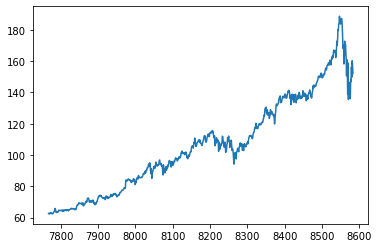

In [12]:
df['Close'].plot() # you can simply plot this to look at what the values look like

That's simple enough, but lets make the plot a bit more descriptive. 

Text(0.5, 1.0, 'MSFT Stock Price ')

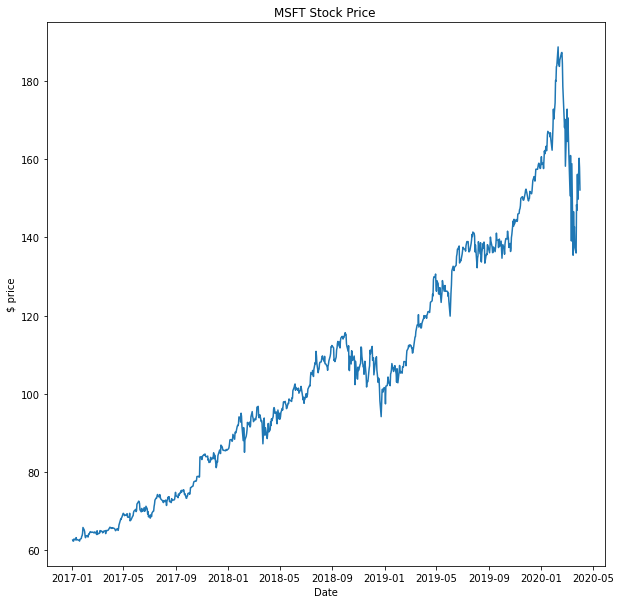

In [13]:
plt.figure(figsize=(10,10)) # this defines the shape of the plot
plt.plot(df['Date'], df['Close']) # what you're actually plotting. This is what generates the plot image
plt.xlabel("Date") # x axis label
plt.ylabel("$ price") # y axis label
plt.title("MSFT Stock Price ") # plot title

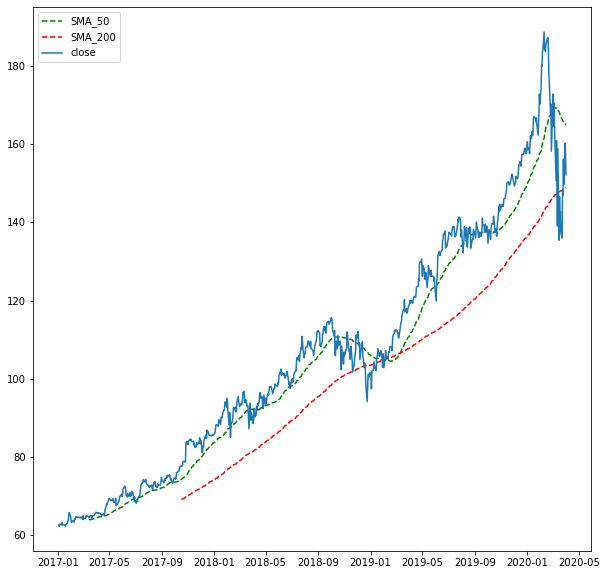

In [14]:
plt.figure(figsize=(10,10))
plt.plot(df['Date'], df['SMA_50'], 'g--', label="SMA_50")
plt.plot(df['Date'], df['SMA_200'], 'r--', label="SMA_200")
plt.plot(df['Date'], df['Close'], label="close")
plt.legend()
plt.show()

# stacking graphs
# but these aren't as informative or helpful as the one above
# these lines only make sense with a specific context

# fig, axs = plt.subplots(3, sharex=True, sharey=True)
# axs[0].plot(df['SMA1'], 'g--', label="SMA1")
# axs[1].plot(df['SMA2'], 'r--', label="SMA2")
# axs[2].plot(df['Close'], label="close")

Moving Average Crossover Trading Strategy:
* The crossover of the two lines singals that it may be smart to take a certain position
* When short-term moving average crosses above the longer moving average, it is an indication to buy
* When short-term moving average crosses below the long term, it is an indication to sell.

There's of course more theory surrounding this, but generally rudimentary analysis on trading data is done in this manner. 